In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

## 0. Описание задачи

Данная задача решает задачу классификации музыки по жанрам на основе набора данных, предоставляемых Spotify. Полный список жанров, включенных в CSV: 'Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'.

## 1. Чтение данных

In [43]:
data = pd.read_csv('../source/music_genre.csv', header=0,  engine='python')
data.shape

(50005, 18)

Среди данных представлены примерно 50 тысяч треков

In [44]:
data.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

In [45]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

Каждый трек имеет 18 признаков:
1. instance_id - идентификатор экземпляра
2. artist_name - имя исполнителя
3. track_name - название трека
4. popularity - популярность трека
5. acousticness - акустичность, «мера уверенности» (от 0 до 1) того, что в треке сделан упор на акустические инструменты.
6. danceability - танцевальность. Танцевальность измеряется с помощью сочетания характеристик песни, таких как сила удара, стабильность темпа и общий темп. Возвращаемое значение определяет легкость, с которой человек может танцевать под песню на протяжении всей песни. Значение 0,0 соответствует наименее танцевальному, а значение 1,0 — наиболее танцевальному.
7. duration_ms - длительность в миллисекундах
8. energy - представляет перцептивную меру интенсивности и активности.
9. instrumentalness - инструментальность, показывает наличие вокала в записи. Чем ближе значение к единице, тем меньше вокала в треке, а значит, тем более он инструментальный.
10. key - показывает преобладание определенной тональности в записи.
11. liveness - описывает вероятность того, что песня была записана с живой аудиторией.
12. loudness - показывает помехи звукозаписывающего оборудования. Шкала расположена от минус бесконечности до нуля — чем ближе значение к нулю, чем чище запись от помех.
13. mode - минор или мажор, 0 или 1
14. speechiness - определяет наличие произносимых слов на дорожке, чем ближе значение этой характеристике к единице, значит, чем больше в записи голоса, а инструментов (музыки) меньше. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0.33 до 0.66 описывают треки, которые могут содержать как музыку, так и речь, либо по частям, либо по слоям, включая такие случаи, как рэп-музыка.
15. tempo - темп - это скорость основного ритма. Подобно сердцебиению, его также можно рассматривать как «пульс» музыки. Темп измеряется в BPM или ударах в минуту. Один удар в секунду составляет 60 ударов в минуту.
16. obtained_date - дата
17. valence - описывает музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), в то время как треки с низкой валентностью звучат более негативно
18. music_genre - жанр музыки, 11 классов.


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

0. instance_id - уникальное числовое значение
1. artist_name - категориальный текстовый признак
2. track_name - текстовый признак 
3. popularity - упорядоченный признак (0-100)
4. acousticness - числовой признак (0.0-1.0)
5. danceability - числовой признак (0.0-1.0)
6. duration_ms - числовой признак (-1-4.83)
7. energy - числовой признак (0.0-1.0)
8. instrumentalness - числовой признак (0.0-1.0)
9. key - категориальный признак (12 уникальных значений)
10. liveness - числовой признак (0.0-1.0) 
11. loudness - числовой признак (-47-3.74)
12. mode - бинарный признак (Major, Minor)
13. speechiness - числовой признак (0.0-1.0)
14. tempo - числовой признак, есть пропущенные значения '?'
15. obtained_date - категориальный признак
16. valence - числовой признак (0.0-1.0)
17. music_genre - категориальный признак

Оказалось, что признак 'tempo', который должен принимать числовые значения, имеет ошибочные значения в достаточно большом количестве данных (см.ниже). Вместо чисел с плавающей запятой некоторые образцы имеют '?'. Из-за чего признак имеет тип object. Резонно заменить '?' на NaN, которое означает пропущенное значение.

In [47]:
data[data['tempo'] == "?"]

instance_id   artist_name               track_name  popularity  \
5          89064.0    Axel Boman                    Hello        47.0   
32         25836.0      PEEKABOO                  Arrival        45.0   
35         27048.0  Fabian Mazur           If U Wanted To        33.0   
36         55617.0    Wax Tailor       The Games You Play        45.0   
39         69685.0          Dahu                   Vessel        37.0   
...            ...           ...                      ...         ...   
49918      63058.0      Big Sean           Bigger Than Me        58.0   
49964      53387.0    Millonario          Rayas de Patrón        59.0   
49967      76585.0     MadeinTYO  I Want (feat. 2 Chainz)        62.0   
49976      79654.0      Big Sean   Sunday Morning Jetpack        52.0   
49977      63945.0     Nate Dogg               Music & Me        58.0   

       acousticness  danceability  duration_ms  energy  instrumentalness key  \
5           0.00523         0.755     519468.0   0.731          0.854000   D   
32          0.02330         0.729     274286.0   0.869          0.585000   F   
35          0.10800         0.493         -1.0   0.682          0.000000   A   
36          0.04780         0.646     253333.0   0.649          0.002520   G   
39          0.20300         0.769     429941.0   0.551          0.882000  A#   
...             ...           ...          ...     ...               ...  ..   
49918       0.29600         0.379     292520.0   0.644          0.000000  A#   
49964       0.08470         0.929     215200.0   0.737          0.000000  G#   
49967       0.17900         0.860     233293.0   0.625          0.000136   D   
49976       0.70000         0.462     225067.0   0.741          0.000000  A#   
49977       0.10500         0.905     240627.0   0.414          0.000366  G#   

       liveness  loudness   mode  speechiness tempo obtained_date  valence  \
5        0.2160   -10.517  Minor       0.0412     ?         4-Apr   0.6140   
32       0.0944    -7.569  Minor       0.1290     ?         4-Apr   0.1380   
35       0.1960    -5.781  Minor       0.2870     ?         4-Apr   0.2390   
36       0.3530    -5.259  Major       0.1170     ?         4-Apr   0.7270   
39       0.1090   -12.520  Minor       0.0408     ?         4-Apr   0.0618   
...         ...       ...    ...          ...   ...           ...      ...   
49918    0.3130    -7.933  Minor       0.1120     ?         5-Apr   0.1440   
49964    0.8610    -6.424  Major       0.1020     ?         4-Apr   0.8860   
49967    0.3000    -6.922  Major       0.1050     ?         4-Apr   0.2210   
49976    0.3400    -8.008  Minor       0.1620     ?         4-Apr   0.5890   
49977    0.0914    -8.112  Minor       0.0615     ?         4-Apr   0.7580   

      music_genre  
5      Electronic  
32     Electronic  
35     Electronic  
36     Electronic  
39     Electronic  
...           ...  
49918     Hip-Hop  
49964     Hip-Hop  
49967     Hip-Hop  
49976     Hip-Hop  
49977     Hip-Hop  

[4980 rows x 18 columns]

In [48]:
data.replace({'tempo': '?'}, {'tempo': np.NaN}, inplace=True)
data['tempo'] = pd.to_numeric(data['tempo'])

#### Исследование данных

In [49]:
len(data['artist_name'].unique()) 

6864

Так как в выборке представлено большое количество артистов. Можно рассмотреть Top-10 по количеству написанной музыки в качестве исследования.

In [50]:
data['artist_name'].value_counts()[:10].sort_values(ascending = True)

Eminem                      147
Yuki Hayashi                167
Capcom Sound Team           169
Drake                       172
Frédéric Chopin             241
Johann Sebastian Bach       314
Ludwig van Beethoven        317
Wolfgang Amadeus Mozart     402
Nobuo Uematsu               429
empty_field                2489
Name: artist_name, dtype: int64

В данных есть неопределенное значение empty_field, которое превосходит по численности. Для дальнейшей работы удалим эти строки, так как это несущественно уменьшит размерность данных, но сделает их более информативными. 

In [51]:
data.drop(data[data['artist_name'] == 'empty_field'].index, inplace = True)

In [52]:
data['artist_name'].value_counts()[:10].sort_values(ascending = True)

Future                     124
Eminem                     147
Yuki Hayashi               167
Capcom Sound Team          169
Drake                      172
Frédéric Chopin            241
Johann Sebastian Bach      314
Ludwig van Beethoven       317
Wolfgang Amadeus Mozart    402
Nobuo Uematsu              429
Name: artist_name, dtype: int64

#### Проверка на наличие нулевых значений

In [53]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}'.format(col, round(pct_missing*100,3)))

instance_id - 0.011
artist_name - 0.011
track_name - 0.011
popularity - 0.011
acousticness - 0.011
danceability - 0.011
duration_ms - 0.011
energy - 0.011
instrumentalness - 0.011
key - 0.011
liveness - 0.011
loudness - 0.011
mode - 0.011
speechiness - 0.011
tempo - 9.944
obtained_date - 0.011
valence - 0.011
music_genre - 0.011


#### Проверка на дубликаты

In [54]:
data.duplicated().any()
duplicated = data.duplicated()
data[duplicated]

instance_id artist_name track_name  popularity  acousticness  \
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness  tempo obtained_date  valence music_genre  
10001       NaN  NaN          NaN    NaN           NaN      NaN         NaN  
10002       NaN  NaN          NaN    NaN           NaN      NaN         NaN  
10003       NaN  NaN          NaN    NaN           NaN      NaN         NaN  
10004       NaN  NaN          NaN    NaN           NaN      NaN         NaN

Таким образом, строки 10001 - 10004 не только дублируются, но и содержат только NaN. Поэтому их можно удалить.

In [55]:
data.drop([10000, 10001, 10002, 10003, 10004], inplace = True)

#### Отбор признаков

Признак instance_id уникален для каждого объекта, то есть обладает высокой энтропией, его нельзя использовать для дальнейшей работы.

In [56]:
len(data['instance_id'].unique()) 

47511

Признак track_name тоже является довольно уникальным для треков, его использование не будет значимым.

In [57]:
len(data['track_name'].unique()) 

39917

Признак obtained_date не является информативным и не несет значимости для определения жанра.

In [58]:
data['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

Таким образом, при первичном анализе данных мы можем убрать нефункциональные признаки.

In [59]:
data = data.drop(['instance_id', 'track_name', 'obtained_date'], axis = 1)

In [60]:
data.reset_index(inplace = True, drop=True)

## 2. Визуализация данных и вычисление основных характеристик

In [61]:
data.describe()

popularity  acousticness  danceability   duration_ms        energy  \
count  47511.000000  47511.000000  47511.000000  4.751100e+04  47511.000000   
mean      44.214350      0.305914      0.558402  2.211645e+05      0.600061   
std       15.541642      0.341002      0.178658  1.283543e+05      0.264171   
min        0.000000      0.000000      0.059600 -1.000000e+00      0.000792   
25%       34.000000      0.020000      0.442000  1.747690e+05      0.434000   
50%       45.000000      0.144000      0.568000  2.192670e+05      0.643000   
75%       56.000000      0.551000      0.687000  2.685560e+05      0.816000   
max       99.000000      0.996000      0.986000  4.830606e+06      0.999000   

       instrumentalness      liveness      loudness   speechiness  \
count      47511.000000  47511.000000  47511.000000  47511.000000   
mean           0.181801      0.193909     -9.124968      0.093520   
std            0.325475      0.161597      6.152549      0.101111   
min            0.000000      0.009670    -47.046000      0.022300   
25%            0.000000      0.096900    -10.847000      0.036100   
50%            0.000159      0.126000     -7.276000      0.048900   
75%            0.155500      0.244000     -5.176000      0.098600   
max            0.996000      1.000000      3.744000      0.942000   

              tempo       valence  
count  42791.000000  47511.000000  
mean     119.960525      0.456303  
std       30.666632      0.247128  
min       34.347000      0.000000  
25%       94.926500      0.257000  
50%      119.906000      0.448000  
75%      140.489000      0.648000  
max      220.276000      0.992000

* count - Количество значений для каждого признака.
* mean - Средние значения.
* std - Стандартные отклонения.
* min/max - Минимальные/Максимальные значения.
* 25%, 75% - Пертвый и третий квартили.
* 50% - Квартиль 50% или медиана.

In [62]:
data.describe(include = [object])

artist_name    key   mode music_genre
count           47511  47511  47511       47511
unique           6862     12      2          10
top     Nobuo Uematsu      G  Major     Country
freq              429   5429  30485        4779

* count - Количество значений для каждого признака.
* unique - Количество уникальных значений.
* top - Наиболее встречающееся значения среди всех.
* freq - Частота наиболее распространенного значения.

#### Проверка сбалансированности классов

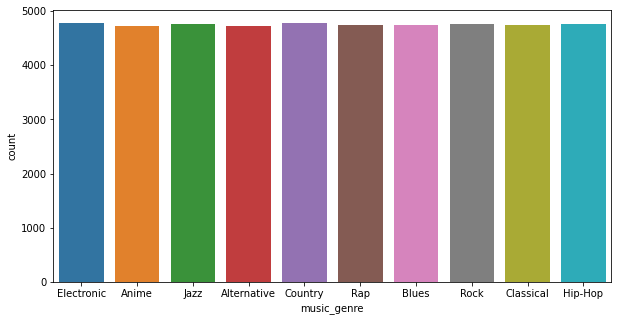

In [63]:
plt.figure(figsize = (10, 5))
sns.countplot(x='music_genre', data=data)
pass

#### Проверка на выбросы

popularity - 1.352%
acousticness - 0.0%
danceability - 0.204%
duration_ms - 13.874%
energy - 0.0%
instrumentalness - 19.87%
liveness - 6.148%
loudness - 7.62%
speechiness - 13.264%
tempo - 0.052%
valence - 0.0%


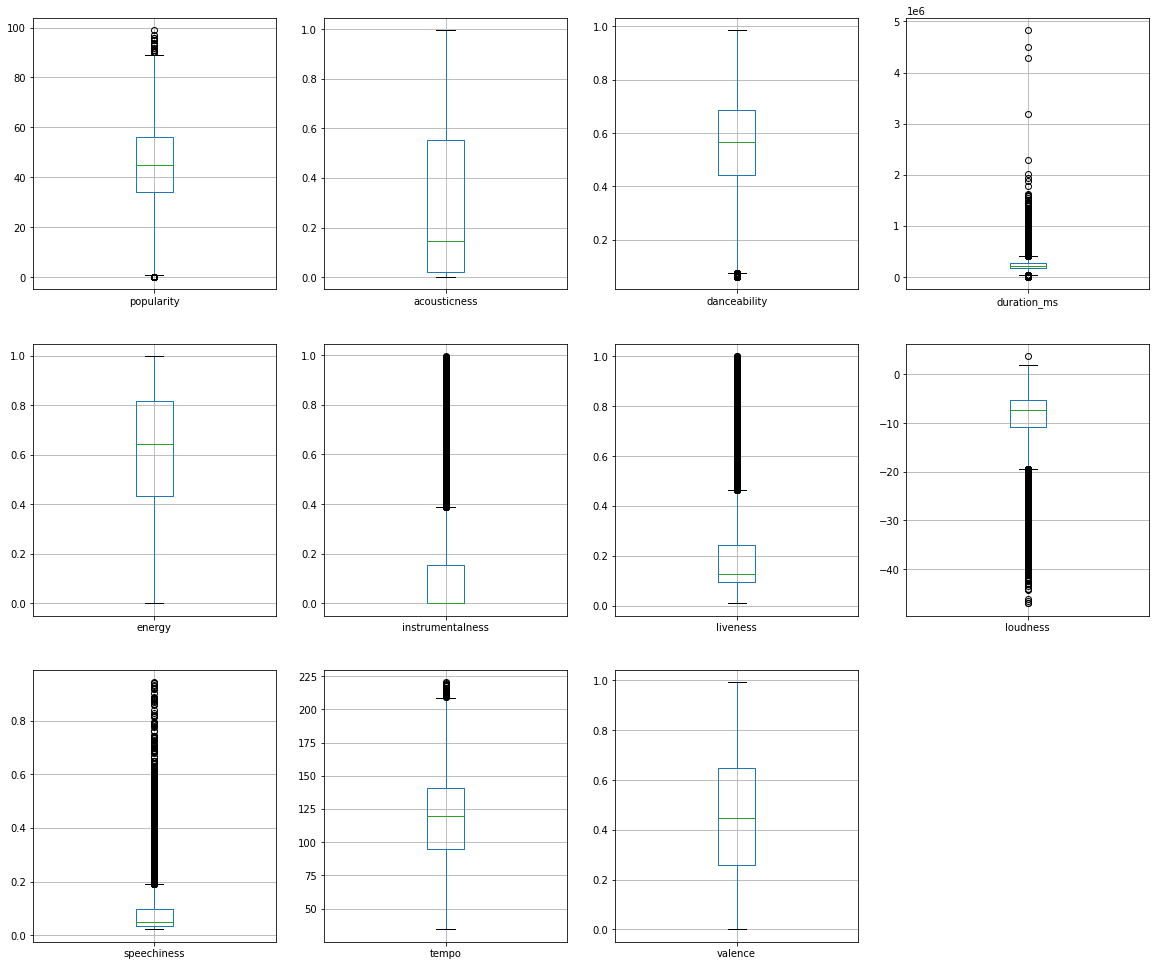

In [64]:
col_num = data.select_dtypes(include=np.number).columns

fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (20, 17))
fig.delaxes(axs[2][3])
index = 0
axs = axs.flatten()
  
for col in col_num:
    Q1, Q3 = data[col].quantile([.25, .75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    pct_outlier = len(data[(data[col] < lower) | (data[col] > upper)].index)*100/50000
    print('{} - {}%'.format(col, round(pct_outlier,3)))
    data.boxplot(column=col, ax = axs[index])
    index += 1
plt.show()

#### Визуализация количественных признаков и их интерпретация

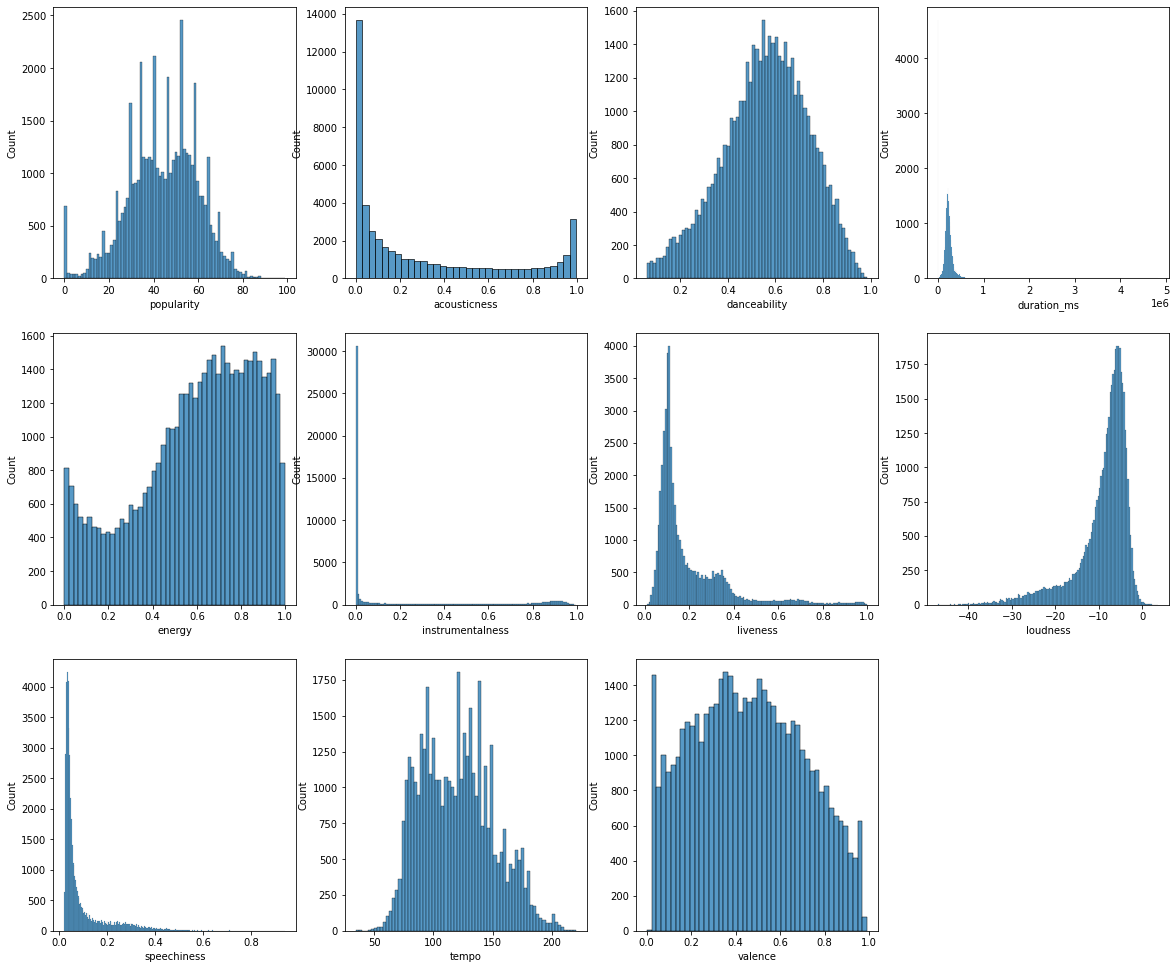

In [65]:
fig, axs = plt.subplots(ncols = 4, nrows = 3, figsize = (20, 17))
fig.delaxes(axs[2][3])
index = 0
axs = axs.flatten()

for col in col_num:
    sns.histplot(data[col], ax = axs[index])
    index += 1
plt.show()

* popularity - популярность трека. Есть несколько пиков по сравнению с общей массой, то есть это наиболее популярные песни. Причем среди всех можно выделить одну самую популярную. Распределение напоминает унимодальное. 

* acousticness - акустичность. 0.0 - совсем не акустическая, 1.0 - сильно акустическая песня. Из гистограммы видно, что большинство песен не являются акустическими. 

* danceability - танцевальность. 0.0 - наименее танцевальная, 1.0 — наиболее танцевальная, то есть с сильными и регулярными ритмами. Из гистограммы можно сказать о нормальном распределении. 

* duration_ms - длительность в миллисекундах. Большинство песен не превышают 0.3e6 миллисекунд, что равно 5 минутам.

* energy - энергия. 0.0 - низкая энергия, 1.0 - высокая энергия. Гистограмма вытянута вправо, то есть большинство песен имеют интенсивность и динамичность.

* instrumentalness - инструментальность. 0.0 - преобладает вокал, менее инструментальный трек, 1.0 - не содержит вокала, более инструментальный. Распределение с обрывом слева, то есть большинство песен имеют значение 0, а это значит, что они вокальные.

* liveness - живость. 0.0 - отсутствие аудитории при записи песни, вероятно песня записана в звукозаписывающей студии, 1.0 - слышится аудитория, вероятно песня исполнена вживую. Распределение с обрывом слева. Большинство песен исполняются без слушателей, это студийные записи. 

* loudness - громкость. Шкала расположена от минус бесконечности до нуля. С низким значением песни звучат тихо.

* speechiness. Чем ближе значение к 1, тем больше в записи голоса, а инструментов меньше. Значения выше 0.66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Смотря на гистограмму, можно сказать, что таких треков почти нет. Распределение слева, то есть большинство треков более музыкальны, без большого количества слов.

* tempo - темп. Измеряется в ударах в минуту. Один удар в секунду составляет 60 ударов в минуту. Большинство песен находятся в диапазоне от 50 до 200 ударов в минуту. Высокий темп - очень быстрая музыка, низкий - медленная. Распределение похоже на бимодальное с несколькими пиками.

* valence - валентность. 0.0 - низкая валентность, пессимистичные песни, 1.0 - высокая валентность, позитивные песни. Смотря на распределение, можно сказать о плато, большинство песен имеют пессимистичный, негативный настрой, и пики наблюдаются у 0, но это довольно грубая оценка. Все же небольшое количество песен имеют высокую валентность.

##### Графики разброса

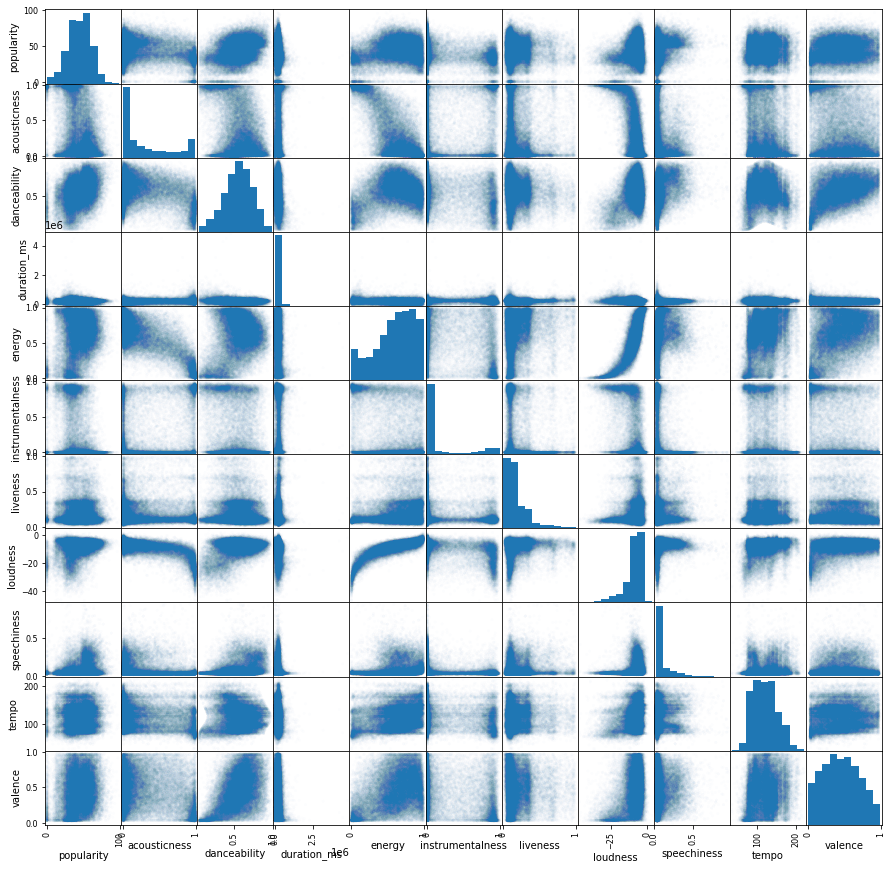

In [66]:
from pandas.plotting import scatter_matrix

scatter_matrix(data, alpha = .01, figsize = (15, 15))
pass

##### Анализ корреляции

In [67]:
corr_matrix = data.corr()
corr_matrix

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.289505      0.356610    -0.084313   
acousticness       -0.289505      1.000000     -0.347833     0.061181   
danceability        0.356610     -0.347833      1.000000    -0.155674   
duration_ms        -0.084313      0.061181     -0.155674     1.000000   
energy              0.214627     -0.790550      0.264090    -0.066278   
instrumentalness   -0.365721      0.386474     -0.301715     0.129943   
liveness           -0.040430     -0.108590     -0.051154     0.020397   
loudness            0.317062     -0.730017      0.390502    -0.102443   
speechiness         0.224411     -0.163859      0.280740    -0.083978   
tempo               0.032761     -0.234088     -0.015108    -0.041216   
valence             0.122691     -0.268688      0.434734    -0.129644   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.214627         -0.365721 -0.040430  0.317062     0.224411   
acousticness     -0.790550          0.386474 -0.108590 -0.730017    -0.163859   
danceability      0.264090         -0.301715 -0.051154  0.390502     0.280740   
duration_ms      -0.066278          0.129943  0.020397 -0.102443    -0.083978   
energy            1.000000         -0.388617  0.186527  0.838171     0.158302   
instrumentalness -0.388617          1.000000 -0.091788 -0.527995    -0.198908   
liveness          0.186527         -0.091788  1.000000  0.126022     0.112744   
loudness          0.838171         -0.527995  0.126022  1.000000     0.165707   
speechiness       0.158302         -0.198908  0.112744  0.165707     1.000000   
tempo             0.263184         -0.125927  0.040232  0.239871     0.068261   
valence           0.395309         -0.272860  0.052997  0.339308     0.059617   

                     tempo   valence  
popularity        0.032761  0.122691  
acousticness     -0.234088 -0.268688  
danceability     -0.015108  0.434734  
duration_ms      -0.041216 -0.129644  
energy            0.263184  0.395309  
instrumentalness -0.125927 -0.272860  
liveness          0.040232  0.052997  
loudness          0.239871  0.339308  
speechiness       0.068261  0.059617  
tempo             1.000000  0.103951  
valence           0.103951  1.000000

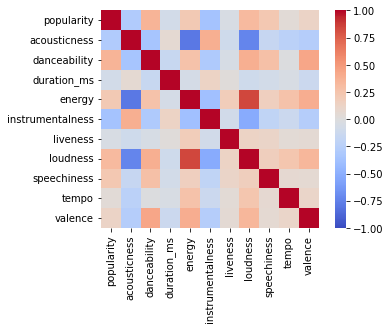

In [68]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin=-1, vmax=1)
pass

Корреляция показывает зависимость признаков. Чем ближе коэффициент к единице по модулю, тем больше связь похожа на линейную. Положительная коррелированность признака говорит о том, что при возрастании значений одного признака растут значения другого. Отрицательная о соответсвующем убывании и возрастании признаков. Смотря на матрицу корреляций и тепловую карту, можно сказать о нескольких сильно зависимых парах (где корреляция по модулю больше 0.7): acousticness - energy, acousticness - loudness, energy - loudness. 

* При уменьшении акустичности песни растет ее энергичность.
* При уменьшении акустичности песни растет ее громкость.
* При увеличении энергичности песни растет ее громкость.

Возвращаясь к графикам разброса, видна почти нулевая корреляция остальных признаков, то есть точки образуют "облако", когда у оговоренных парах точки сгруппированы вдоль одной прямой.

#### Визуализация категориальных признаков

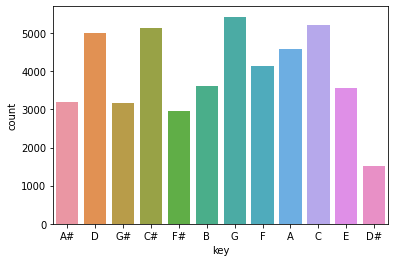

In [69]:
sns.countplot(x = 'key', data = data, order=data['key'].unique())
plt.show()

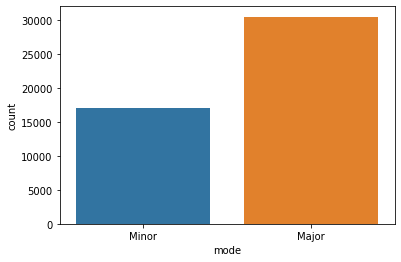

In [70]:
sns.countplot(x = 'mode', data = data)
plt.show()

#### Диаграммы рассеивания по отношению к классам

Не будем строить для всех данных, чтобы не было сильной загроможденности, возьмем случайные 5%

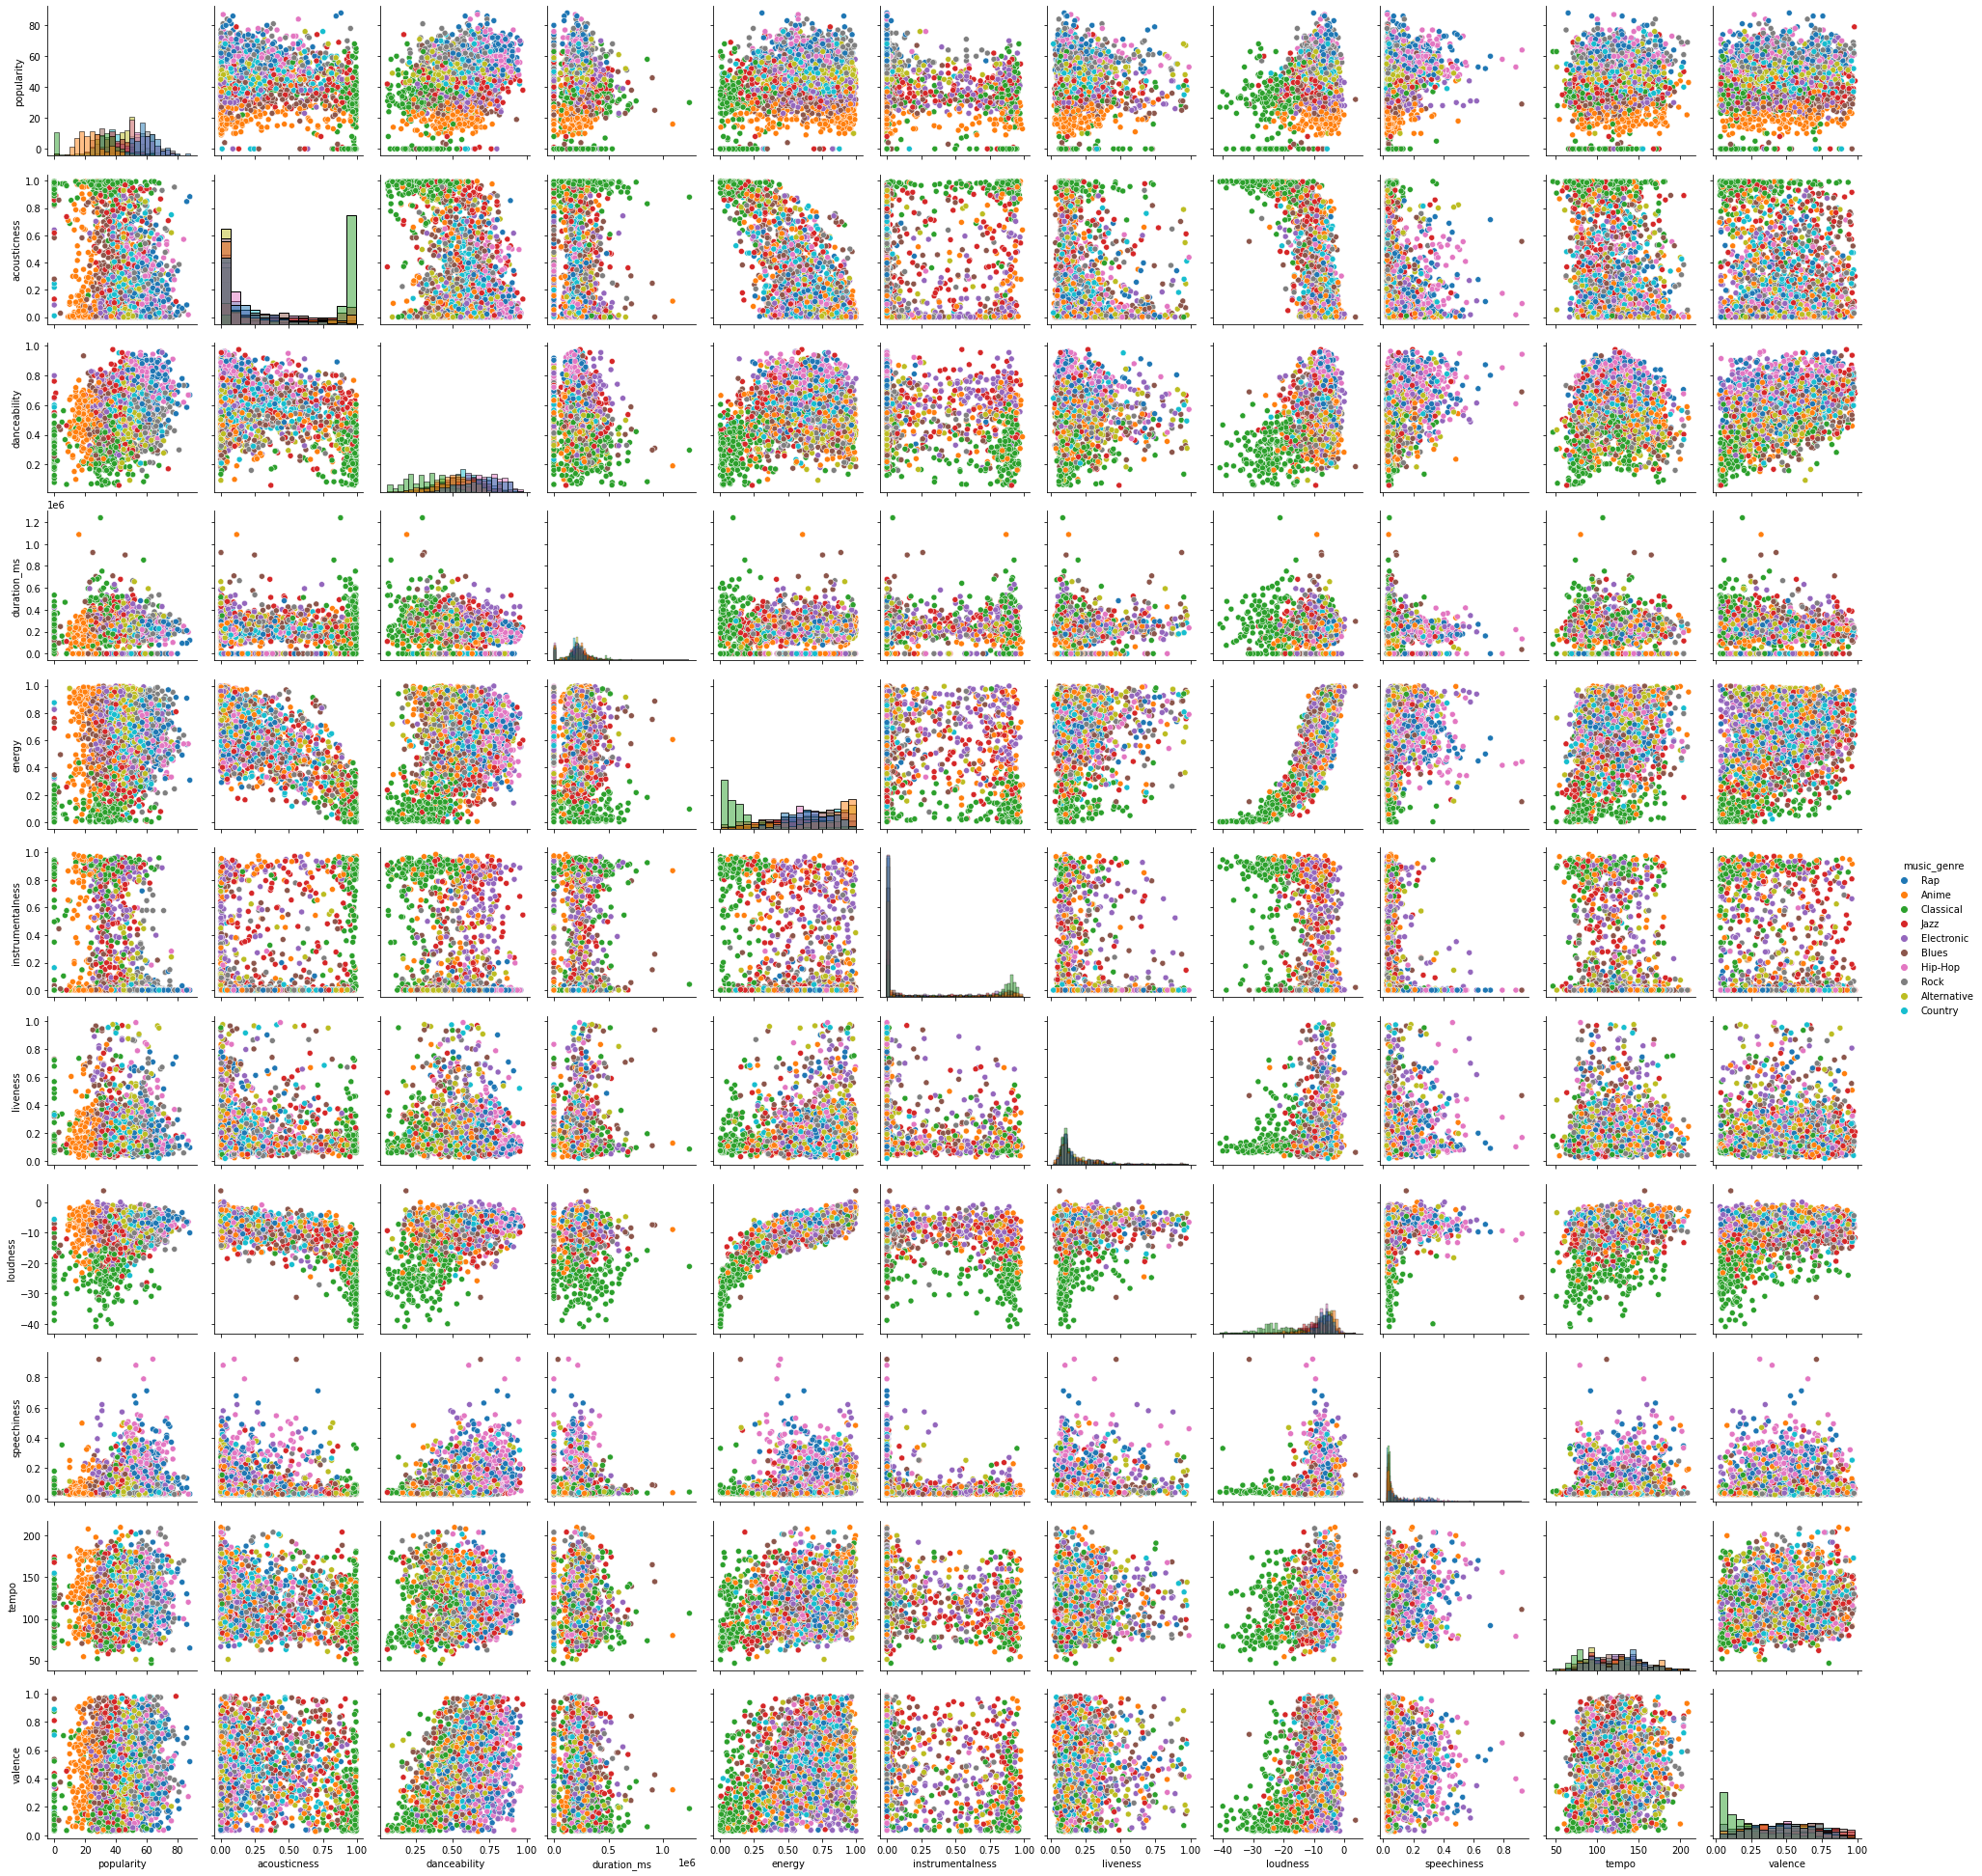

In [71]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=int(0.05 * data.shape[0]), replace=False)
sns.pairplot(data.iloc[random_subset], hue='music_genre', diag_kind='hist')

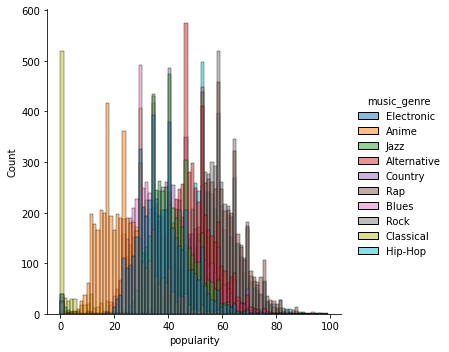

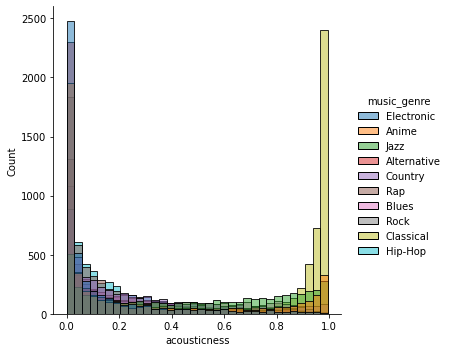

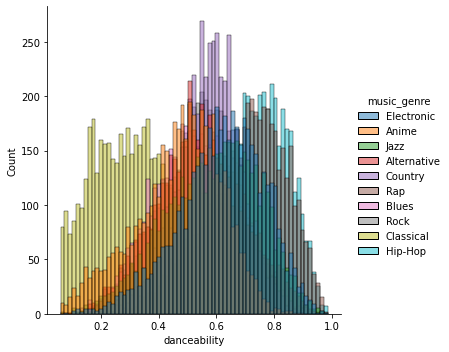

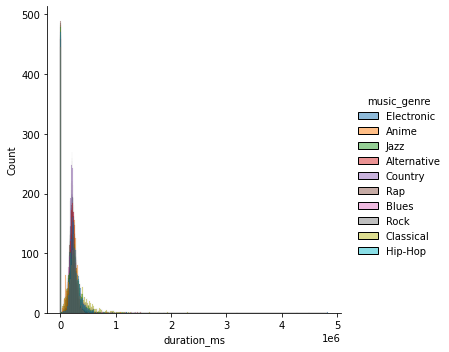

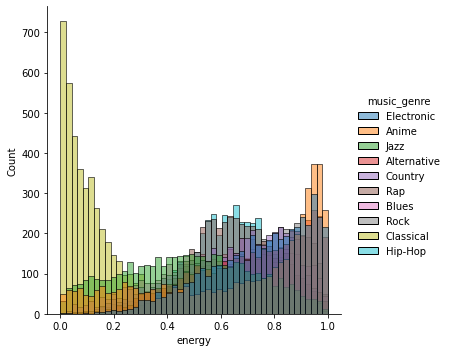

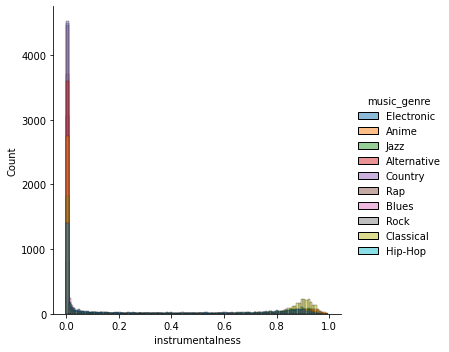

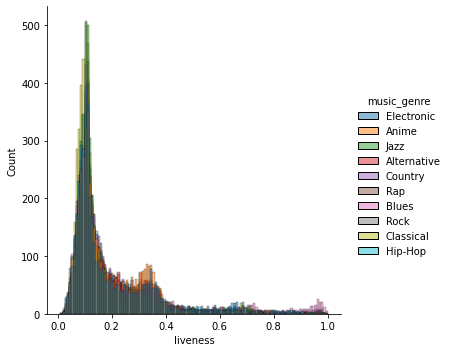

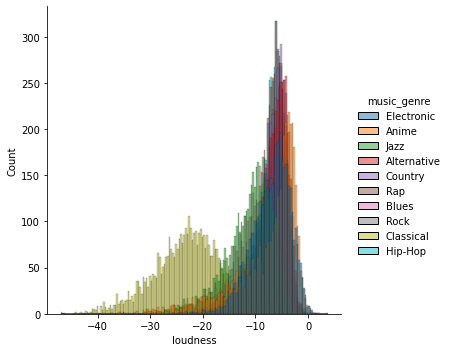

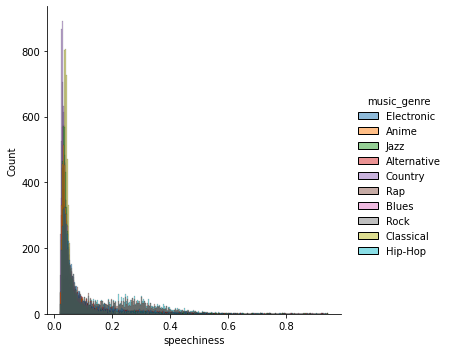

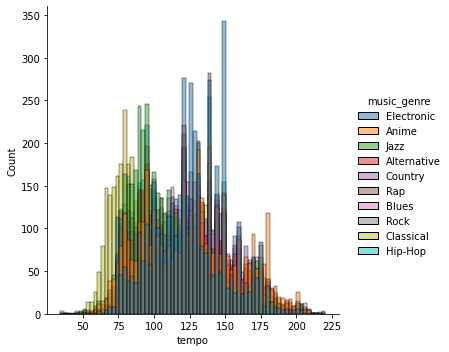

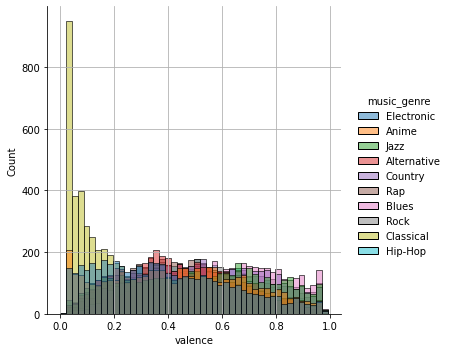

In [72]:
for col in col_num:
    sns.displot(data=data, x=col, kind='hist', hue='music_genre')
plt.grid()

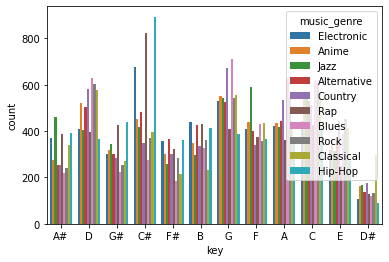

In [73]:
sns.countplot(x='key', hue='music_genre', data=data)
pass

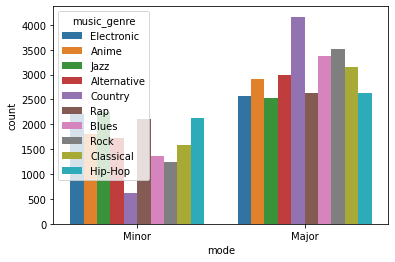

In [74]:
sns.countplot(x='mode', hue='music_genre', data=data)
pass

## 3. Обработка пропущенных значений

Исследование на дубликаты выявило данные с отсутсвующими значениями, в следствии чего мы их удалили. Повторная проверка на пропущенные значения показывает, что их наличие есть только в признаке tempo. Причем их количество существенно - примерно 10%. Что не позволит нам просто их выбросить.

In [75]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}'.format(col, round(pct_missing*100,3)))

artist_name - 0.0
popularity - 0.0
acousticness - 0.0
danceability - 0.0
duration_ms - 0.0
energy - 0.0
instrumentalness - 0.0
key - 0.0
liveness - 0.0
loudness - 0.0
mode - 0.0
speechiness - 0.0
tempo - 9.935
valence - 0.0
music_genre - 0.0


Поэтому заполним эти пропуски средними значениями по классу. 

Процентное соотношение пропусков для каждого класса по отдельности.

In [76]:
for genre in data['music_genre'].unique():
    pct_missing = np.mean(data['tempo'][data[data['music_genre']==genre].index].isnull())
    print('{} - {}'.format(genre, round(pct_missing*100,3)))

Electronic - 10.655
Anime - 10.025
Jazz - 9.476
Alternative - 10.152
Country - 10.274
Rap - 9.837
Blues - 10.664
Rock - 8.701
Classical - 10.076
Hip-Hop - 9.485


In [77]:
for genre in data['music_genre'].unique():
    data[data.isnull().any(axis=1)&(data['music_genre']==genre)] = data[(data.isnull().any(axis=1))&(data['music_genre']==genre)].fillna(data[data['music_genre']==genre].mean())

C:\Users\August\AppData\Local\Temp\ipykernel_10128\956779467.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data.isnull().any(axis=1)&(data['music_genre']==genre)] = data[(data.isnull().any(axis=1))&(data['music_genre']==genre)].fillna(data[data['music_genre']==genre].mean())


In [78]:
data.isnull().sum()

artist_name         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64

## 4. Обработка категориальных признаков

Кодируем признаки key и mode методом LabelEncoder(). А признак artist_name можно убрать

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
data['key'] = LabelEncoder().fit_transform(data['key'])

In [81]:
data['mode'] = LabelEncoder().fit_transform(data['mode'])

In [82]:
data = data.drop(['artist_name'], axis = 1)

In [83]:
data.head()

popularity  acousticness  danceability  duration_ms  energy  \
0        27.0       0.00468         0.652         -1.0   0.941   
1        31.0       0.01270         0.622     218293.0   0.890   
2        28.0       0.00306         0.620     215613.0   0.755   
3        34.0       0.02540         0.774     166875.0   0.700   
4        32.0       0.00465         0.638     222369.0   0.587   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0           0.79200    1     0.115    -5.201     1       0.0748  100.889   
1           0.95000    5     0.124    -7.043     1       0.0300  115.002   
2           0.01180   11     0.534    -4.617     0       0.0345  127.994   
3           0.00253    4     0.157    -4.498     0       0.2390  128.014   
4           0.90900    9     0.157    -6.266     0       0.0413  145.036   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

## 5. Нормализация признаков

Разделим данные на признаки (features) и целевые переменные (target).

In [84]:
data_features = data.drop('music_genre', axis = 1)
data_target = data['music_genre']

В качестве масштабирования признаков можно выбрать нормализацию MinMaxScaler() (приведение к значениям [-1,1] или [0,1]) или  стандартизацию StandardScaler() (центрирование около 0 ​​со стандартным отклонением 1). Второй способ для данных содержащих выбросы более уместен по отношению к классификаторам, которые основаны на рассчете расстояния между объектами.

In [85]:
from sklearn import preprocessing

s_scaler = preprocessing.StandardScaler()
data_features_scaled = s_scaler.fit_transform(data_features)

## 6. Разделение данных на обучающую и тестовую выборки

Проведем разделение набора данных на обучающую и тестовую в соотношении 70% и 30%, причем деление будет происходить в соответсвии распределению классов с помощью параметра stratify.

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features_scaled, data_target, test_size = 0.3, stratify = data_target, random_state = 42)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33257, 13), (14254, 13), (33257,), (14254,))

## 7. Классификация

### KNN 

Сначала попробуем сделать классификацию с количеством соседей по умолчанию, 5 соседей.

Accuracy — это показатель, который описывает общую точность предсказания модели по всем классам. Это особенно полезно, когда каждый класс одинаково важен. Он рассчитывается как отношение количества правильных прогнозов к их общему количеству.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

knn_train_predict = knn_model.score(X_train, y_train)
knn_test_predict = knn_model.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * knn_train_predict, 100 * knn_test_predict))

Accuracy: train : 63.96%, test: 47.03%. 


In [89]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(X_train, y_train)

knn_train_predict = knn_model.score(X_train, y_train)
knn_test_predict = knn_model.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * knn_train_predict, 100 * knn_test_predict))

Accuracy: train : 59.73%, test: 49.55%. 


Увеличив количество соседей до 10, видим, что точность на обучающей выборке снизилась, а на тестовой возрасла. Попробуем провести поиск наилучшего параметра с помощью GridSearchCV

#### Подбор гиперпараметров для модели KNN

In [90]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 30, 35]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print("Error: {:.2f}%, neighbors: {} ".format(100 * best_cv_err, best_n_neighbors))

Error: 48.62%, neighbors: 30 


In [91]:
knn_model_best = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

knn_train_predict = knn_model_best.score(X_train, y_train)
knn_test_predict = knn_model_best.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * knn_train_predict, 100 * knn_test_predict))

Accuracy: train : 55.77%, test: 51.20%. 


### Анализ качества предсказания, матрица ошибок

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, knn_model_best.predict(X_test)))

              precision    recall  f1-score   support

 Alternative       0.36      0.34      0.35      1418
       Anime       0.69      0.65      0.67      1418
       Blues       0.56      0.42      0.48      1424
   Classical       0.78      0.84      0.81      1420
     Country       0.42      0.61      0.50      1434
  Electronic       0.61      0.52      0.56      1433
     Hip-Hop       0.39      0.47      0.43      1427
        Jazz       0.50      0.40      0.45      1431
         Rap       0.38      0.32      0.35      1421
        Rock       0.48      0.53      0.50      1428

    accuracy                           0.51     14254
   macro avg       0.52      0.51      0.51     14254
weighted avg       0.52      0.51      0.51     14254



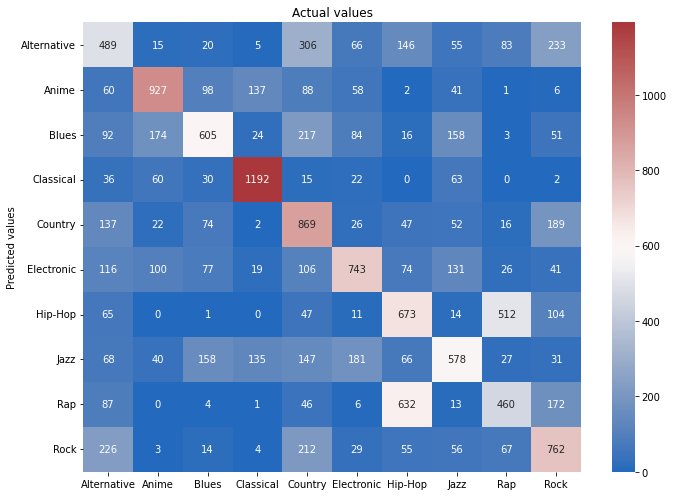

In [93]:
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, knn_model_best.predict(X_test)),
                            annot = True, cmap = "vlag", fmt = ".0f",
                            xticklabels = knn_model_best.classes_,
                            yticklabels = knn_model_best.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

Проанализируем матрицу ошибок. Правильно классифицированные треки показаны на диагонали, а выше и ниже диагонали соответственно ошибочно. Видно, что преобладают правильные прогнозы. Например, у классической музыки (Classical). Действительно, обращаясь к проделанному анализу данных, у этого жанра наиболее отличительные признаки. Однако существенно выделяются несколько значений выше и ниже диагонали. Например, 632 песни были предсказаны как Rap, однако являются Hip-Hop. И наоборот, 512 песен были предсказаны как Hip-Hop, но являются Rap. На самом деле, если проанализировать признаки объектов этих классов, то в них есть много схожести. Немаленькое значение у пресказания Alternative вместо Country - 306, Rock вместо Alternative - 226 и Alternative вместо Rock - 233.


Таким образом, модель далека от идеальности. Каждая проверка дает неудовлетворительные результаты, однако весьма жизненные неточности, так как пары ошибочно предсказанных жанров действительно похожи. Но сам метод KNN является достаточно простым. Рассмотрим другие алгоритмы классификации и сравним точность предсказания.

### SVC

In [94]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

svc_train_predict = svc_model.score(X_train, y_train)
svc_test_predict = svc_model.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * svc_train_predict, 100 * svc_test_predict))

Accuracy: train : 60.81%, test: 57.17%. 


#### Подбор гиперпараметров для модели SVC

In [109]:
svc_param = {"C": [0.1, 1, 10, 100, 1000], 
             "gamma": [1, 0.1, 0.01, 0.001, 0.0001]}
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = svc_param)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [110]:
best_cv_err = 1 - grid.best_score_
best_svc_param = grid.best_params_
print("Error: {:.2f}%, parameters: {} ".format(100 * best_cv_err, best_svc_param))

Error: 43.25%, parameters: {'C': 100, 'gamma': 0.01} 


In [111]:
svc_model_best = SVC(C=100, gamma=0.01)
svc_model_best.fit(X_train, y_train)

svc_train_predict = svc_model_best.score(X_train, y_train)
svc_test_predict = svc_model_best.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * svc_train_predict, 100 * svc_test_predict))

Accuracy: train : 60.24%, test: 57.43%. 


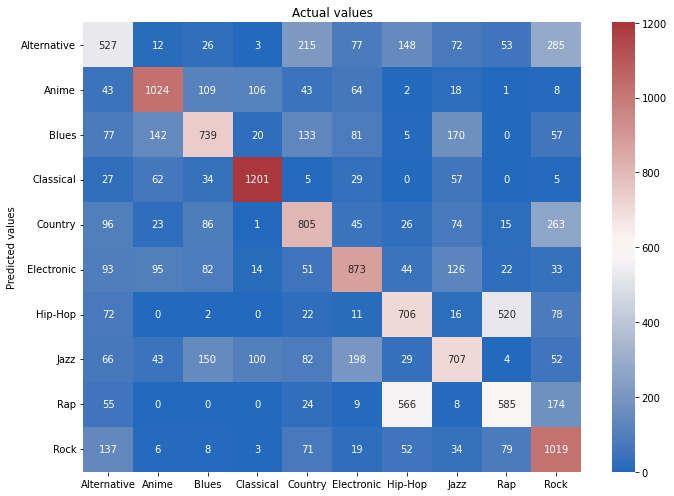

In [112]:
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, svc_model_best.predict(X_test)),
                            annot = True, cmap = "vlag", fmt = ".0f",
                            xticklabels = svc_model_best.classes_,
                            yticklabels = svc_model_best.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

### Random Forest 

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_train_predict = rf_model.score(X_train, y_train)
rf_test_predict = rf_model.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * rf_train_predict, 100 * rf_test_predict))

Accuracy: train : 97.91%, test: 56.48%. 


#### Подбор гиперпараметров для модели Random Forest

In [102]:
rf_param = {"n_estimators": [15, 20, 25, 30, 35],
            "max_depth": [5, 10, 15, 20, 25],
            "min_samples_leaf": [1, 2, 3, 4, 5]}
rf = RandomForestClassifier()            
grid = GridSearchCV(rf, param_grid = rf_param, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [15, 20, 25, 30, 35]})

In [103]:
best_rf_err = 1 - grid.best_score_
best_rf_param = grid.best_params_
print("Error: {:.2f}%, parameters: {} ".format(100 * best_rf_err, best_rf_param))

Error: 42.31%, parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'n_estimators': 35} 


In [104]:
rf_model_best = RandomForestClassifier(max_depth = 15, min_samples_leaf = 4, n_estimators = 35)
rf_model_best.fit(X_train, y_train)

rf_train_predict = rf_model_best.score(X_train, y_train)
rf_test_predict = rf_model_best.score(X_test, y_test)
print("Accuracy: train : {:.2f}%, test: {:.2f}%. ".format(100 * rf_train_predict, 100 * rf_test_predict))

Accuracy: train : 81.11%, test: 57.30%. 


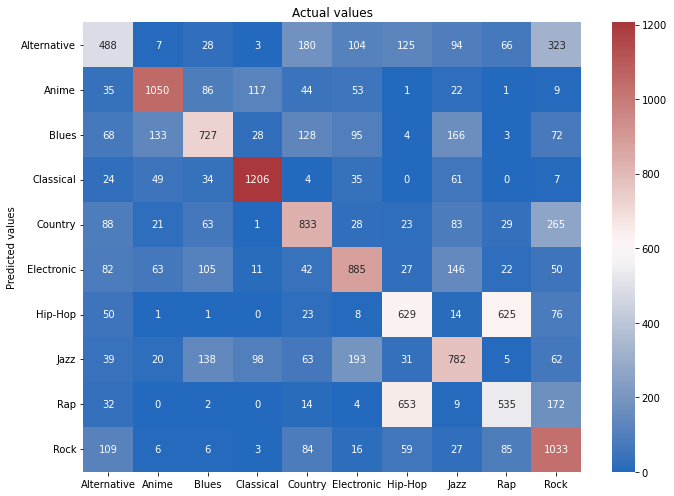

In [105]:
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix(y_test, rf_model_best.predict(X_test)),
                            annot = True, cmap = "vlag", fmt = ".0f",
                            xticklabels = rf_model_best.classes_,
                            yticklabels = rf_model_best.classes_)
plt.title("Actual values")
plt.ylabel("Predicted values")
plt.tight_layout()
plt.show()

Таким образом, наиболее лучшую точность на обучающей выборке показал алгоритм Random Forest. Но на тестовой - SVC. Если сравнивать по скорости обучения, то Random Forest - наиболее быстрый метод, а SVC оказался самым медленным. Для улучшения точности результатов были сделаны подборы гиперпараметров для каждой модели, но, к сожалению, они не принесли большой пользы. Были рассмотрены несколько конкретных значений, чтобы процесс не был очень затратным.

Вычислим с помощью алгоритма Random Forest важность признаков, и посмотрим, какие признаки внесли наибольший и наименьший вклад в классификацию

In [113]:
rf_model_best.feature_importances_

array([0.23513858, 0.10016682, 0.09350967, 0.04529584, 0.07463535,
       0.09728516, 0.01686169, 0.02901029, 0.08956722, 0.01164378,
       0.09521619, 0.052326  , 0.0593434 ])

In [115]:
data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence', 'music_genre'],
      dtype='object')

Видим, что наибольший вклад внес признак popularity